In [1]:
import pandas as pd
import numpy as np

In [49]:
# read dataset 
df = pd.read_csv("../Data/merged_data.csv")
RA = pd.read_csv("https://raw.githubusercontent.com/kaebry/DSF/main/Data/extrater_radiation.csv")


In [50]:
# select all observation until the end of 2019
df = df.loc[df["datetime"]<"2019-12-31 23:00:00+01:00"]
df.drop(columns=["wind_direction", "wind_gust_max_10min", "wind_force_avg_10min", "windchill", "Pegel Zurichsee", "Pegel Obersee", "Pegel Zurichsee", "Pegel Linth", "Pegel Limmat", "Wasser_temp Linth"], inplace=True)

df.rename(columns={"Wädenswil (20cm)": "suction_tension (20cm)", "Wädenswil (40cm)": "suction_tension (40cm)", "Wädenswil (70cm)": "suction_tension (70cm)",
 "wind_speed_avg_10min": "wind_speed (m/s)", "precipitation": "precipitation (mm)","Abfluss Linth": "inflow_linth (m3/s)",
                   "Abfluss Limmat": "outflow_limmat (m3/s)"}, inplace=True)


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60754 entries, 0 to 60753
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   datetime                 60754 non-null  object 
 1   suction_tension (20cm)   60666 non-null  float64
 2   suction_tension (40cm)   60675 non-null  float64
 3   suction_tension (70cm)   60673 non-null  float64
 4   air_temperature          60619 non-null  float64
 5   water_temperature        60619 non-null  float64
 6   wind_speed (m/s)         60619 non-null  float64
 7   barometric_pressure_qfe  60619 non-null  float64
 8   dew_point                60619 non-null  float64
 9   humidity                 60619 non-null  float64
 10  water_level              60619 non-null  float64
 11  precipitation (mm)       60754 non-null  float64
 12  global_radiation         60754 non-null  float64
 13  change_rate              60754 non-null  float64
 14  inflow_linth (m3/s)   

In [52]:

# impute the missing values of the dataset using spline interpolate imputation. We are taking the mean of the two values before and after the 
# observation with the missing value to get the best possible approximation. The interpolate imputation is the best method to impute 
# and we chose the spline method because that way we can smooth the estimations since we don´t have linear data
# source: https://www.section.io/engineering-education/missing-values-in-time-series/ 
df[["suction_tension (20cm)", "suction_tension (40cm)", "suction_tension (70cm)", "air_temperature", "water_temperature", "wind_speed (m/s)", 
"barometric_pressure_qfe", "dew_point", "humidity","water_level", "inflow_linth (m3/s)","outflow_limmat (m3/s)"]]= df[["suction_tension (20cm)", 
"suction_tension (40cm)", "suction_tension (70cm)", "air_temperature", "water_temperature", "wind_speed (m/s)", "barometric_pressure_qfe", 
"dew_point", "humidity","water_level", "inflow_linth (m3/s)","outflow_limmat (m3/s)"]].interpolate(option='spline')


In [53]:
# update the change rate variable after imputing the water level variable
df["change_rate"] = df["water_level"].pct_change()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60754 entries, 0 to 60753
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   datetime                 60754 non-null  object 
 1   suction_tension (20cm)   60754 non-null  float64
 2   suction_tension (40cm)   60754 non-null  float64
 3   suction_tension (70cm)   60754 non-null  float64
 4   air_temperature          60754 non-null  float64
 5   water_temperature        60754 non-null  float64
 6   wind_speed (m/s)         60754 non-null  float64
 7   barometric_pressure_qfe  60754 non-null  float64
 8   dew_point                60754 non-null  float64
 9   humidity                 60754 non-null  float64
 10  water_level              60754 non-null  float64
 11  precipitation (mm)       60754 non-null  float64
 12  global_radiation         60754 non-null  float64
 13  inflow_linth (m3/s)      60754 non-null  float64
 14  outflow_limmat (m3/s) 

<AxesSubplot: >

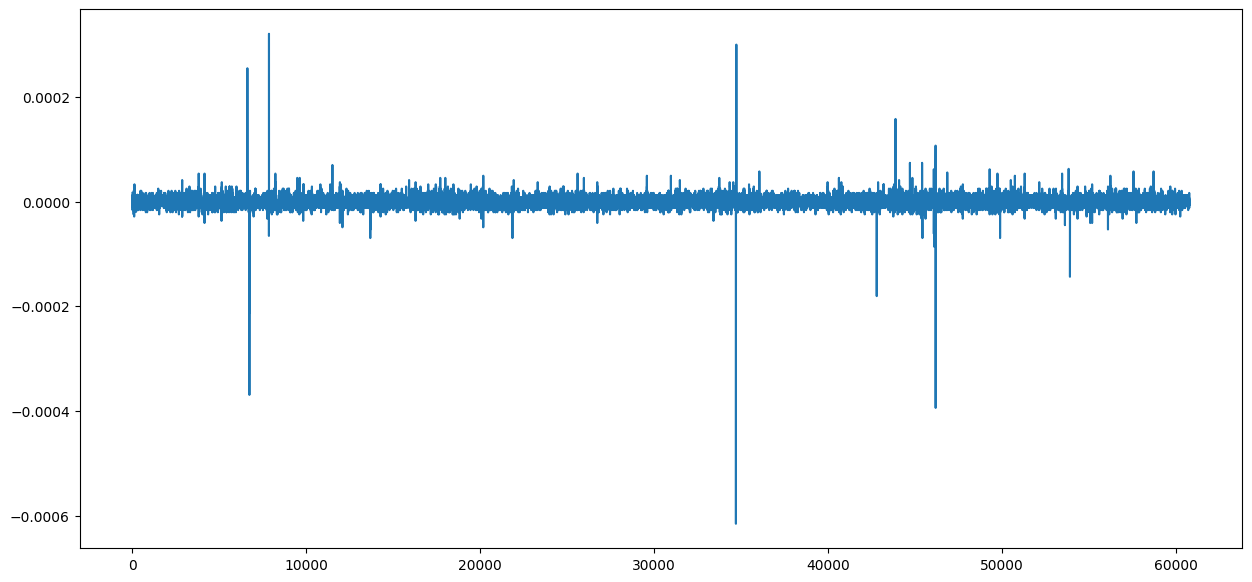

In [55]:
df["change_rate"].plot()

In [56]:
df

,datetime,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),air_temperature,water_temperature,wind_speed (m/s),barometric_pressure_qfe,dew_point,humidity,water_level,precipitation (mm),global_radiation,inflow_linth (m3/s),outflow_limmat (m3/s),change_rate
0,2012-01-01 01:00:00+01:00,0.500,0.600,1.000,7.516667,5.900000,2.516667,972.333333,6.833333,93.833333,405.893333,0.1,0.0,29.328,134.098,NaN
1,2012-01-01 02:00:00+01:00,0.600,0.700,1.000,7.333333,5.900000,3.266667,972.550000,6.400000,94.333333,405.900000,0.0,1.0,29.543,143.515,0.000016
2,2012-01-01 03:00:00+01:00,0.700,0.800,1.200,9.116667,5.900000,2.650000,972.616667,7.250000,88.166667,405.901667,0.0,9.0,29.741,158.646,0.000004
3,2012-01-01 04:00:00+01:00,0.800,0.800,1.200,9.716667,5.900000,2.900000,972.183333,7.483333,86.000000,405.908333,0.0,8.0,30.058,165.654,0.000016
4,2012-01-01 05:00:00+01:00,1.000,0.900,1.300,9.966667,5.900000,3.366667,972.216667,7.366667,83.833333,405.910000,0.0,2.0,30.277,163.086,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60749,2019-11-27 01:00:00+01:00,4.780,3.565,3.720,5.800000,10.166667,2.700000,953.483333,5.683333,99.166667,405.950000,0.0,0.0,41.555,73.187,0.000000
60750,2019-11-27 02:00:00+01:00,3.405,2.760,4.530,5.850000,10.100000,1.683333,953.100000,5.816667,100.000000,405.946667,0.0,0.0,41.411,73.130,-0.000008
60751,2019-11-27 03:00:00+01:00,4.730,3.540,3.695,6.116667,10.183333,0.900000,952.466667,6.050000,99.000000,405.953333,0.0,0.0,41.214,73.402,0.000016
60752,2019-11-27 04:00:00+01:00,4.810,3.585,3.635,6.333333,10.150000,1.133333,951.600000,6.233333,99.333333,405.948333,0.0,0.0,40.911,73.292,-0.000012


In [57]:
# rename column and merge the two dataframes
RA.rename(columns={"Irradiance (W/m2)": "extraterrestial_radiation"}, inplace=True)
df_RA = pd.merge(df, RA, how="inner", on="datetime")

In [58]:
# check if there are any missing values after the merge
df_RA["extraterrestial_radiation"].isna().unique()

array([False])

In [59]:
df_RA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60754 entries, 0 to 60753
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   datetime                   60754 non-null  object 
 1   suction_tension (20cm)     60754 non-null  float64
 2   suction_tension (40cm)     60754 non-null  float64
 3   suction_tension (70cm)     60754 non-null  float64
 4   air_temperature            60754 non-null  float64
 5   water_temperature          60754 non-null  float64
 6   wind_speed (m/s)           60754 non-null  float64
 7   barometric_pressure_qfe    60754 non-null  float64
 8   dew_point                  60754 non-null  float64
 9   humidity                   60754 non-null  float64
 10  water_level                60754 non-null  float64
 11  precipitation (mm)         60754 non-null  float64
 12  global_radiation           60754 non-null  float64
 13  inflow_linth (m3/s)        60754 non-null  flo

In [60]:
# this is the simplified version of the penman equation to compute evaporation based on global radiation (RS), air teperature (T), extraterrestial radiation (RA), 
# humidity (RH), and wind speed (U)
 
def evaporation(RS,T,RA,RH,U, alpha=0.08, au=0.5):
  Epen = (0.051*(1-alpha)*RS*np.sqrt(T+9.5))-(2.4*(RS/RA)**2)+(0.052*(T+20)*(1-(RH/100))*(au-0.38+0.54*U))
  return Epen

In [61]:
# create new variable evaporation by applying the evaporation function
df_RA["evaporation"] = evaporation(df_RA["global_radiation"], df_RA["air_temperature"], df_RA["extraterrestial_radiation"], df_RA["humidity"], df_RA["wind_speed (m/s)"])

c:\Users\lucal\miniconda3\envs\dsf\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [69]:
df_RA.set_index("datetime", inplace=True)

In [73]:
# For the missing values of the evaporation we are using the KNNImputer to fill in the missing values.
# we use the KNN imputer because it fills in the value based of the mean values of observations with variable values most similar to the observation
# with the missing value. 
# The NaNs occure for observations with a very low (ca. below -9 degrees Celsius) temperature because then the argument in the square root
# turn negative. Because of this we often have missing values for many consecutive observations in a row and because we have all other values
# for of one observation the KNN imputer makes more sense than interpolation 

# We are standardizing the values before we apply the KNN imputer and destandardize them afterwards again. That way we circumvent biases for the
# imputed values
# source: Htoon, K. S. (2020).  A Guide To KNN Imputation. retrieved from: 
# https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

# import KNN imputer
from sklearn.impute import KNNImputer
# import MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# standardize data
data_scaled = pd.DataFrame(scaler.fit_transform(df_RA), columns = df_RA.columns)

imputer = KNNImputer()
# impute missing values with KNN imputer and convert them to floats
data_imputed = pd.DataFrame(imputer.fit_transform(data_scaled), columns=df_RA.columns, index = df_RA.index).astype(float)
# de standardize the imputed dataframe to get original unit of measurement
data_imputed = pd.DataFrame(scaler.inverse_transform(data_imputed), columns = df_RA.columns, index = df_RA.index)


In [76]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60754 entries, 2012-01-01 01:00:00+01:00 to 2019-11-27 05:00:00+01:00
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   suction_tension (20cm)     60754 non-null  float64
 1   suction_tension (40cm)     60754 non-null  float64
 2   suction_tension (70cm)     60754 non-null  float64
 3   air_temperature            60754 non-null  float64
 4   water_temperature          60754 non-null  float64
 5   wind_speed (m/s)           60754 non-null  float64
 6   barometric_pressure_qfe    60754 non-null  float64
 7   dew_point                  60754 non-null  float64
 8   humidity                   60754 non-null  float64
 9   water_level                60754 non-null  float64
 10  precipitation (mm)         60754 non-null  float64
 11  global_radiation           60754 non-null  float64
 12  inflow_linth (m3/s)        60754 non-null  float64
 13  outflow

In [77]:
# safe dataframe as csv
data_imputed.to_csv("../data/data_all_variables.csv", index=True)

In [80]:
# drop variables that are included in the evaporation
df_reduced = data_imputed.drop(columns=["air_temperature", "wind_speed (m/s)", "global_radiation", "humidity", "extraterrestial_radiation"])


In [83]:
# safe dataframe as csv
df_reduced.to_csv("../data/data_reduced_variables.csv", index=False)